# G2M Insight for Cab Investment Firm

In [55]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [56]:
cab_data = pd.read_csv("datasets/Cab_Data.csv")
city_data = pd.read_csv("datasets/City.csv")
customer_data = pd.read_csv("datasets/Customer_ID.csv")
transaction_data = pd.read_csv("datasets/Transaction_ID.csv")

## Limits on Data
Limits on data: no time information

## Data Profiling
#### Cab Dataset

In [57]:
print("CAB DATA INFO")
cab_data_info = cab_data.info()
print("\nCAB DATA HEAD")
cab_data_head = cab_data.head()
display(cab_data_head)
print("\nCAB DATA DESCRIBE")
cab_data_describe = cab_data.describe()
display(cab_data_describe)

CAB DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB

CAB DATA HEAD


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776



CAB DATA DESCRIBE


,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


High-level Observations and Insights On Cab Dataset
- The Date of Travel column is in Excel serial date format
    - May need conversion if pandas has no easy way to deal with these dates
- Future analysis topics from this table
    - (Price charged - cost of trip) to find **profitability** of each company
    - Compare KM traveled to date of travel/city to find trends
- No null values found

#### City Dataset

In [58]:
print("CITY DATA INFO")
city_data_info = city_data.info()
print("\nCITY DATA HEAD")
city_data_head = city_data.head()
display(city_data_head)
print("\nCITY DATA DESCRIBE")
city_data_describe = city_data.describe()
display(city_data_describe)

CITY DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes

CITY DATA HEAD


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"



CITY DATA DESCRIBE


,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


High-level Observations and Insights On City Dataset
- The population and users columns are not integers
    - This will hinder future analysis and should be dealt with in cleaning phase
- This dataset in combination with the number of cab users can be used to find **market penetration**
    - This can also allude to adoption rate of new cabs
- This dataset in combination with cab_data can be used to see profits by city
- No null values found

#### Customer Dataset

In [59]:
print("CUSTOMER DATA INFO")
customer_data_info = customer_data.info()
print("\nCUSTOMER DATA HEAD")
customer_data_head = customer_data.head()
display(customer_data_head)
print("\nCUSTOMER DATA DESCRIBE")
customer_data_describe = customer_data.describe()
display(customer_data_describe)

CUSTOMER DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

CUSTOMER DATA HEAD


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536



CUSTOMER DATA DESCRIBE


,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


High-level Observations and Insights On Customer Dataset
- Income is in USD/Month rather than a yearly value
- Income joined with transaction table can give insight into which demographic uses cabs the most
- Gender/Age in combination with other datasets
    - See gender distribution of both companies
    - See age distribution of both companies
- No null values found

#### Transaction Dataset

In [60]:
print("TRANSACTION DATA INFO")
transaction_data_info = transaction_data.info()
print("\nTRANSACTION DATA HEAD")
transaction_data_head = transaction_data.head()
display(transaction_data_head)
print("\nTRANSACTION DATA DESCRIBE")
transaction_data_describe = transaction_data.describe()
display(transaction_data_describe)

TRANSACTION DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB

TRANSACTION DATA HEAD


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card



TRANSACTION DATA DESCRIBE


,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


High-level Observations and Insights On Transaction Dataset
- Payment_Mode column can be used to find the preferred type of payment
    - Can be expanded with other datasets to find if the preference 
    has trends with age, gender, etc.
- No null values found

## Data Cleaning
#### Checking for Nulls

In [61]:
cab_data_missing_values = cab_data.isnull().sum()
city_data_missing_values = city_data.isnull().sum()
customer_id_missing_values = customer_data.isnull().sum()
transaction_id_missing_values = transaction_data.isnull().sum()

print(f"Cab data:\n{cab_data_missing_values}", end="\n\n")
print(f"City data:\n{city_data_missing_values}", end="\n\n")
print(f"Customer data:\n{customer_id_missing_values}", end="\n\n")
print(f"Transaction data:\n{transaction_id_missing_values}", end="\n\n")

Cab data:
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

City data:
City          0
Population    0
Users         0
dtype: int64

Customer data:
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

Transaction data:
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64



No missing values in any columns, so we can continue.
#### Checking for Duplicates

In [62]:
cab_data_duplicates = cab_data.duplicated().sum()
city_data_duplicates = city_data.duplicated().sum()
customer_data_duplicates = customer_data.duplicated().sum()
transaction_data_duplicates = transaction_data.duplicated().sum()

cab_data_duplicates, city_data_duplicates, customer_data_duplicates, transaction_data_duplicates

(0, 0, 0, 0)

No duplicates in any columns, so we can continue. The data is in excellent condition so far.
#### Checking for Outliers
##### Cab Dataset


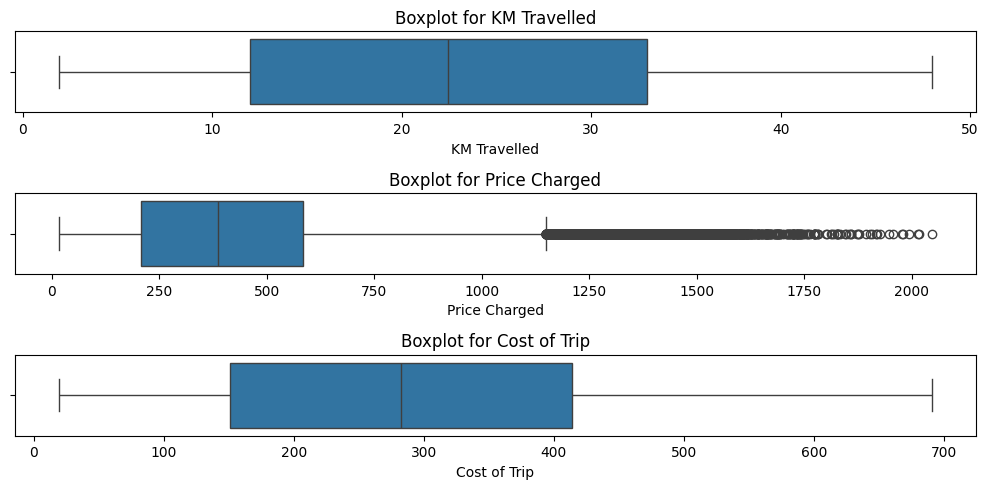


    Number of outliers

    Km traveled: 0
    Price charged: 5958
    Cost of trip: 0



In [63]:
# Visual approach
plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
sb.boxplot(x=cab_data["KM Travelled"])
plt.title("Boxplot for KM Travelled")

plt.subplot(3, 1, 2)
sb.boxplot(x=cab_data["Price Charged"])
plt.title("Boxplot for Price Charged")

plt.subplot(3, 1, 3)
sb.boxplot(x=cab_data["Cost of Trip"])
plt.title("Boxplot for Cost of Trip")

plt.tight_layout()
plt.show()

# Statistical approach
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter for outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

km_travelled_outliers = detect_outliers_iqr(cab_data["KM Travelled"])
price_charged_outliers = detect_outliers_iqr(cab_data["Price Charged"])
cost_of_trip_outliers = detect_outliers_iqr(cab_data["Cost of Trip"])

print(f"""
    Number of outliers\n
    Km traveled: {len(km_travelled_outliers)}
    Price charged: {len(price_charged_outliers)}
    Cost of trip: {len(cost_of_trip_outliers)}
""")

While there are a large number of outliers in the price charged column, prices in the low two thousands does not seem unreasonable for a long cab trip during peak hours.

As for KM traveled and cost of trip, there are no outliers to remove.

##### City Dataset
We will start off by converting population and users columns to integers, then continue outlier analysis.

In [64]:
# the if statments stop errors in the case this cell is rerun and coversion has already taken place
if city_data["Population"].dtype == 'O':
    city_data["Population"] = city_data["Population"].str.replace(',', '').str.strip().astype(int)
if city_data["Users"].dtype == 'O':
    city_data["Users"] = city_data["Users"].str.replace(',', '').str.strip().astype(int)
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


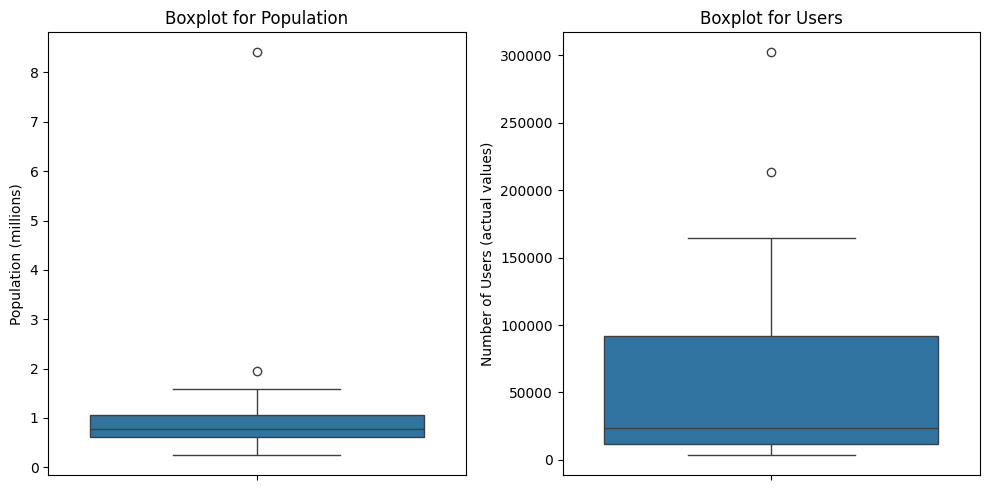


    Number of outliers

    Population: 2
    Users: 2



In [65]:
# Visual approach
plt.figure(figsize=(10, 5))

# Boxplot for Population
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(y=city_data["Population"]/1_000_000)
ax1.get_yaxis().get_major_formatter().set_scientific(False)
plt.title("Boxplot for Population")
plt.ylabel("Population (millions)")

# Box plot for Users without scientific notation
plt.subplot(1, 2, 2)
ax2 = sb.boxplot(y=city_data["Users"])
ax2.get_yaxis().get_major_formatter().set_scientific(False)
plt.title("Boxplot for Users")
plt.ylabel("Number of Users (actual values)")

plt.tight_layout()
plt.show()

# Statistical approach
population_outliers = detect_outliers_iqr(city_data["Population"])
users_outliers = detect_outliers_iqr(city_data["Users"])


print(f"""
    Number of outliers\n
    Population: {len(population_outliers)}
    Users: {len(users_outliers)}
""")

The 2 outliers for population and users are likely valid as city populations can be large. To double check, we will look into which cities these two points are referring to.

In [66]:
# Highest Population Cities
top_population = city_data.sort_values(by="Population", ascending=False).head(3)

# Highest Users Cities
top_users = city_data.sort_values(by="Users", ascending=False).head(3)

display(top_population)
display(top_users)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132


,City,Population,Users
0,NEW YORK NY,8405837,302149
14,SAN FRANCISCO CA,629591,213609
1,CHICAGO IL,1955130,164468


None of these outliers warrant removal as New York and Chicago are heavily populated cities. As for San Francisco being the second highest for users at almost 1/3rd the population, this is worth investigating during the analysis phase.

##### Customer Dataset

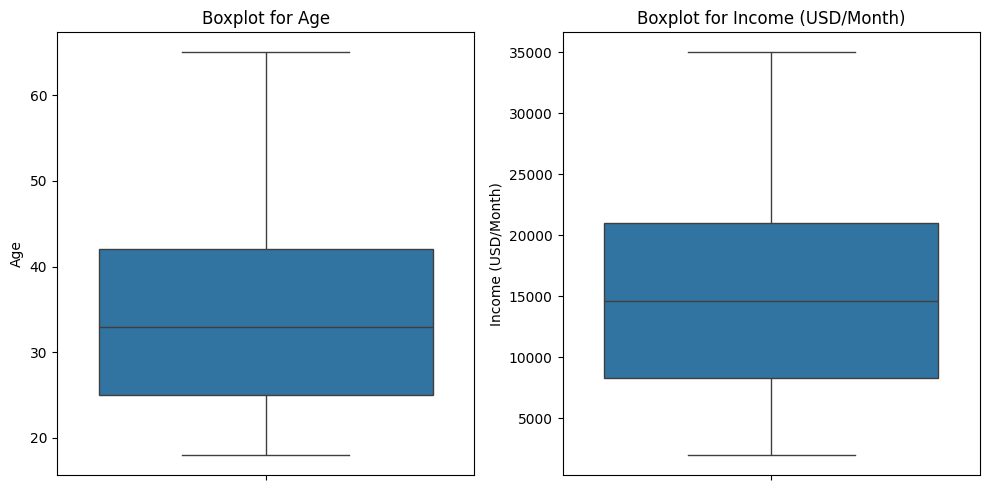


    Number of outliers

    Age: 0
    Income: 0



In [67]:
# Visual Approach
plt.figure(figsize=(10, 5))

# Boxplot for Age
plt.subplot(1, 2, 1)
sb.boxplot(y=customer_data["Age"])
plt.title("Boxplot for Age")

# Boxplot for Income
plt.subplot(1, 2, 2)
sb.boxplot(y=customer_data["Income (USD/Month)"])
plt.title("Boxplot for Income (USD/Month)")

plt.tight_layout()
plt.show()

# Statistical Approach
age_outliers = detect_outliers_iqr(customer_data["Age"])
income_outliers = detect_outliers_iqr(customer_data["Income (USD/Month)"])

print(f"""
    Number of outliers\n
    Age: {len(age_outliers)}
    Income: {len(income_outliers)}
""")


No outliers are present for age or income.
##### Transaction Dataset

In [68]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


As there is no numeric columns that need outlier checking.    
Now, as we have cleaned the data, we can move into finding relationships and trends in the data with statistics and visualizations.

## Data Analysis and Visualization
##### Cab Dataset

/var/folders/5t/3kjrc3_52dvby4fwwc9q_77m0000gn/T/ipykernel_3928/2297674104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=cab_data, x='Company', palette=['pink', 'yellow'])


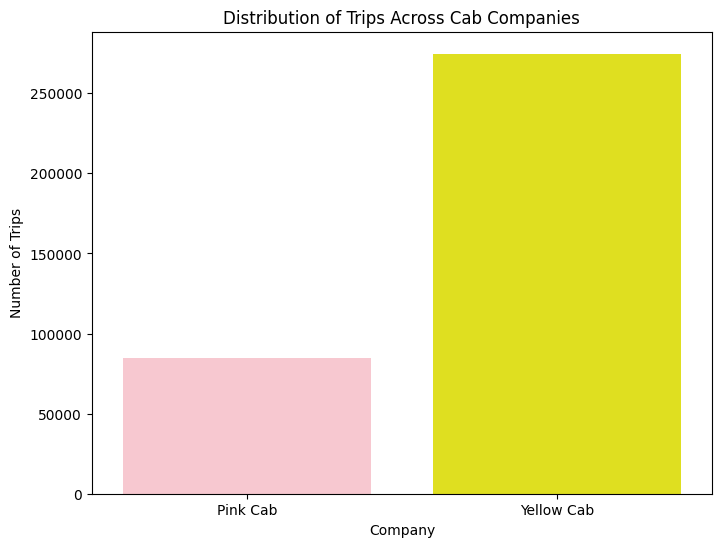

In [69]:
plt.figure(figsize=(8, 6))
sb.countplot(data=cab_data, x='Company', palette=['pink', 'yellow'])
plt.title('Distribution of Trips Across Cab Companies')
plt.ylabel('Number of Trips')
plt.show()

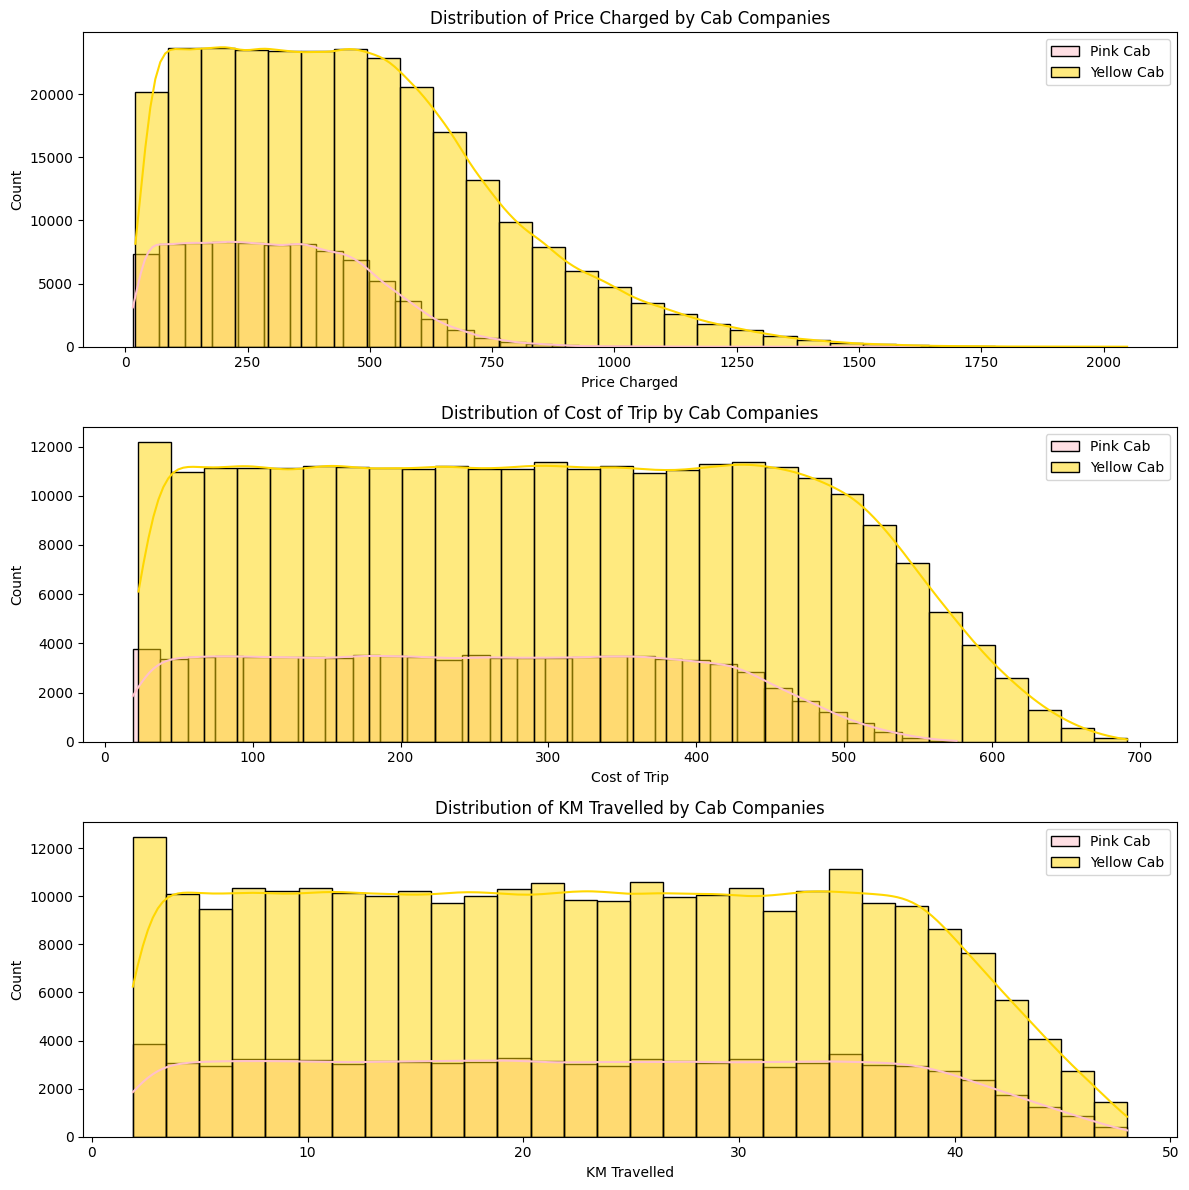

In [70]:
plt.figure(figsize=(12, 12))

# Histogram for Price Charged
plt.subplot(3, 1, 1)
for company, color in [('Pink Cab', 'pink'), ('Yellow Cab', 'gold')]:
    subset = cab_data[cab_data['Company'] == company]
    sb.histplot(subset['Price Charged'], kde=True, label=company, bins=30, color=color)
plt.title('Distribution of Price Charged by Cab Companies')
plt.legend()

# Histogram for Cost of Trip
plt.subplot(3, 1, 2)
for company, color in [('Pink Cab', 'pink'), ('Yellow Cab', 'gold')]:
    subset = cab_data[cab_data['Company'] == company]
    sb.histplot(subset['Cost of Trip'], kde=True, label=company, bins=30, color=color)
plt.title('Distribution of Cost of Trip by Cab Companies')
plt.legend()

# Histogram for KM Travelled
plt.subplot(3, 1, 3)
for company, color in [('Pink Cab', 'pink'), ('Yellow Cab', 'gold')]:
    subset = cab_data[cab_data['Company'] == company]
    sb.histplot(subset['KM Travelled'], kde=True, label=company, bins=30, color=color)
plt.title('Distribution of KM Travelled by Cab Companies')
plt.legend()

plt.tight_layout()
plt.show()

Yellow Cab seems to handle a wider range of clients on the longer and more expensive end of trips while Pink Cab focuses on shorter and inexpensive trips. This trend carries to KM traveled and cost of trip to a lesser extent.

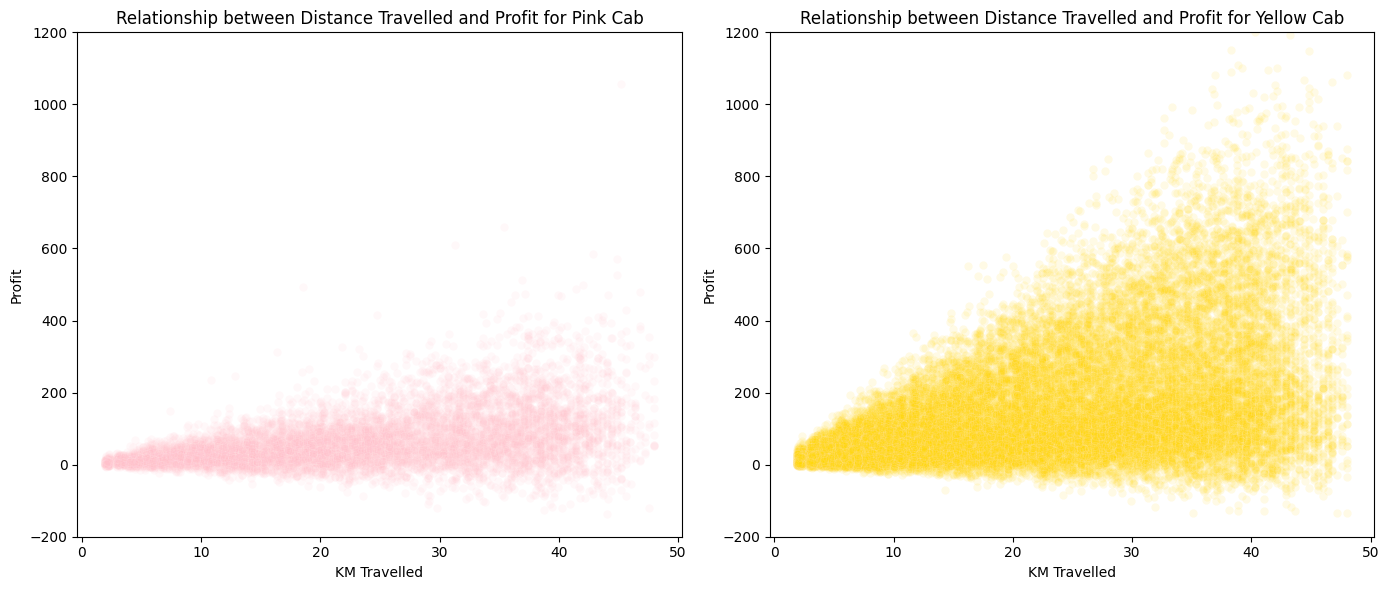

In [71]:
# Creating profit column
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

# The graph was too cluttered, so we are sampling 10% of the data
sample_cab_data = cab_data.sample(frac=0.1, random_state=42)

plt.figure(figsize=(14, 6))

# Pink Cab
plt.subplot(1, 2, 1)
pink_data = sample_cab_data[sample_cab_data['Company'] == 'Pink Cab']
sb.scatterplot(data=pink_data, x='KM Travelled', y='Profit', color='pink', alpha=0.1)
plt.title('Relationship between Distance Travelled and Profit for Pink Cab')
plt.ylim(-200, 1200)

# Yellow Cab
plt.subplot(1, 2, 2)
yellow_data = sample_cab_data[sample_cab_data['Company'] == 'Yellow Cab']
sb.scatterplot(data=yellow_data, x='KM Travelled', y='Profit', color='gold', alpha=0.1)
plt.title('Relationship between Distance Travelled and Profit for Yellow Cab')
plt.ylim(-200, 1200)

plt.tight_layout()
plt.show()

Both companies have a higher variability of profit as the ride gets longer, but Yellow cab seems to have better chances for higher yields for longer rides. It is also interesting to note that both companies show none or negative profits at all distances traveled.

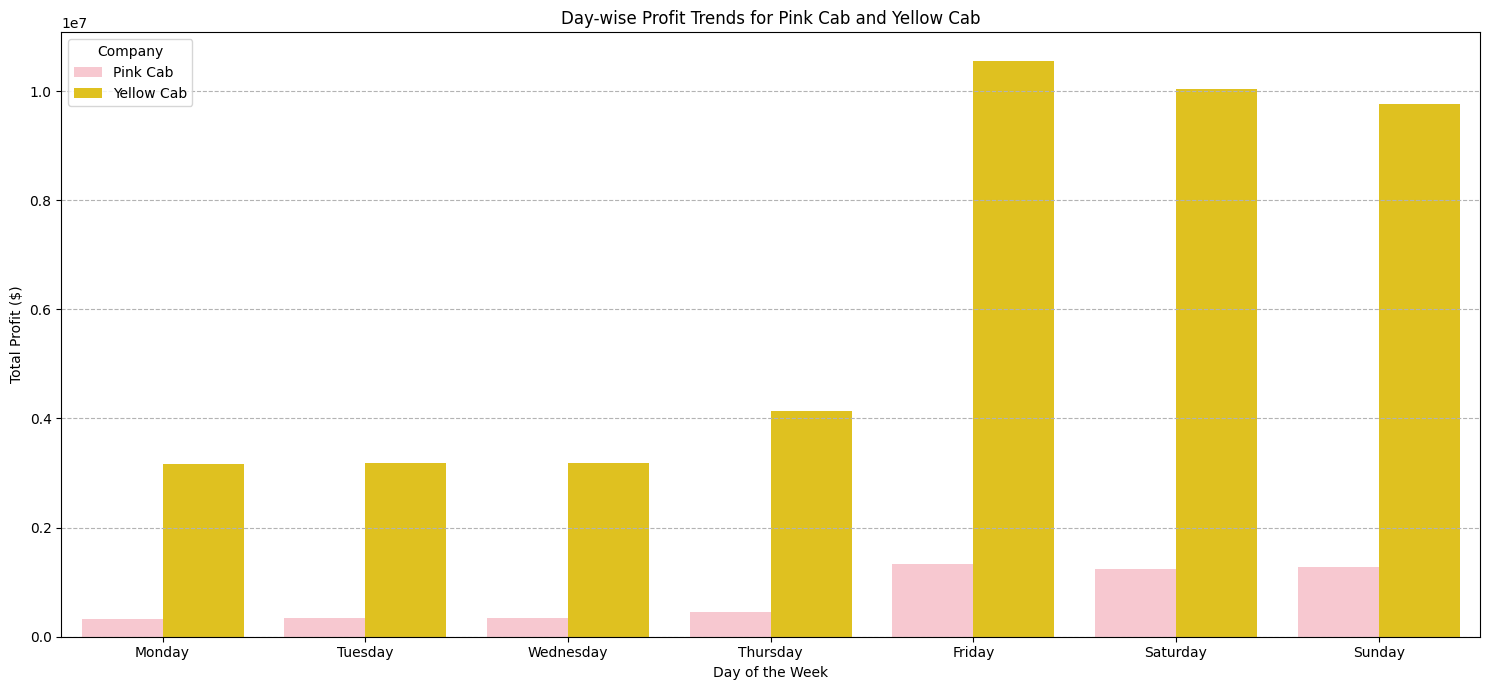

In [72]:
# First we deal with the date conversion (excel -> datetime)
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')

# Extracting day
cab_data['Day of Week'] = cab_data['Date of Travel'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Grouping data by day/company
daywise_profit = cab_data.groupby(['Day of Week', 'Company'])['Profit'].sum().reset_index()

# Plotting the day-wise profit trends for both companies
plt.figure(figsize=(15, 7))
sb.barplot(data=daywise_profit, x='Day of Week', y='Profit', hue='Company', order=day_order, palette=['pink', 'gold'])
plt.title('Day-wise Profit Trends for Pink Cab and Yellow Cab')
plt.xlabel('Day of the Week')
plt.ylabel('Total Profit ($)')
plt.legend(title="Company")
plt.grid(True, axis='y', ls="--", c='0.7')
plt.tight_layout()
plt.show()

From this visualization, we can see that the trend in profits is consistent with Monday through Thursday being the lowest, and a large jump on Friday through Sunday. This jump in profits is even more pronounced on the weekend. Yellow Cab continues to perform better than Pink Cab, outperforming by a large margin every day of the week.

##### City Dataset

/var/folders/5t/3kjrc3_52dvby4fwwc9q_77m0000gn/T/ipykernel_3928/4134156014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=city_data.sort_values(by='Users', ascending=False), x='City', y='Users', palette='viridis')


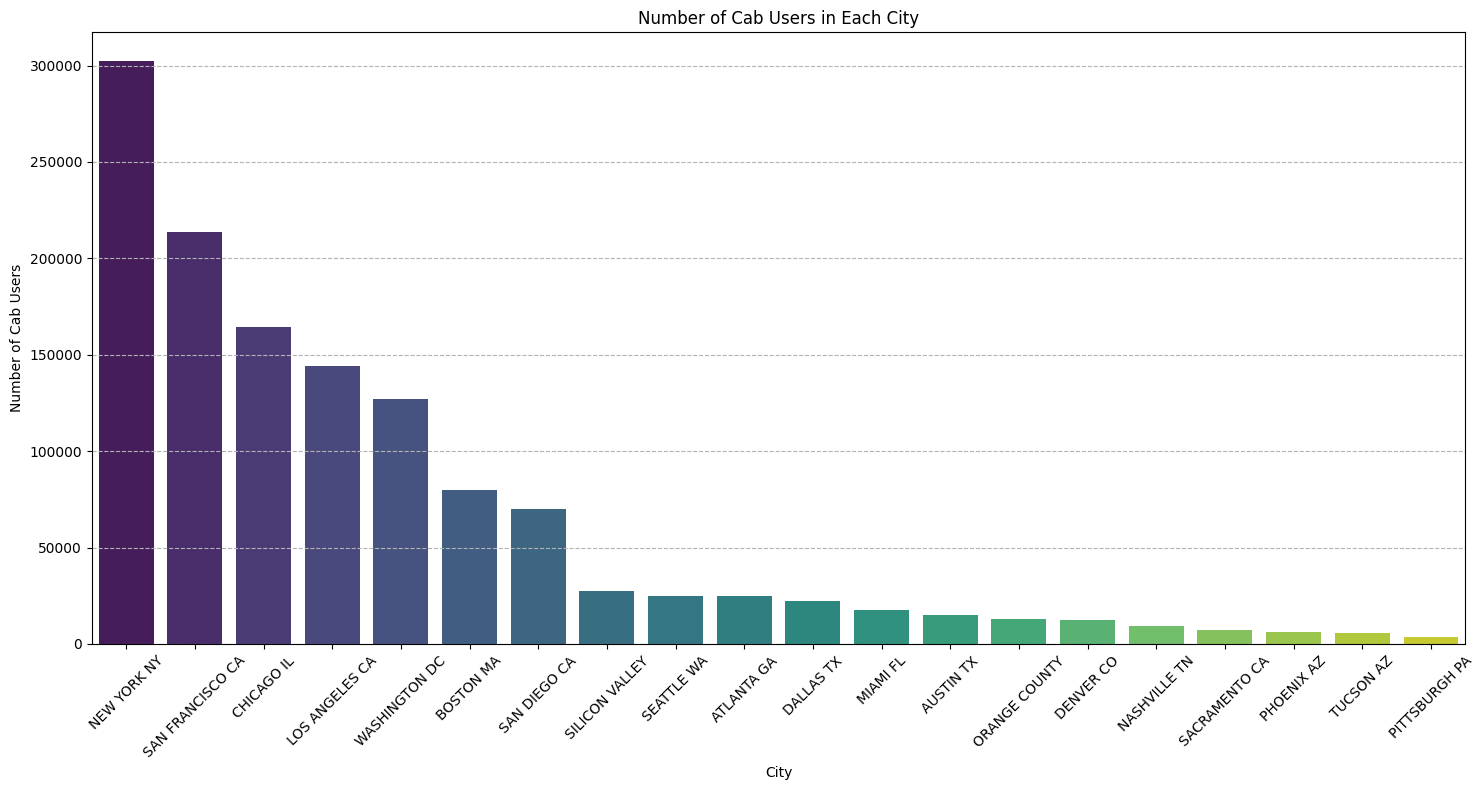

In [73]:
plt.figure(figsize=(15, 8))
sb.barplot(data=city_data.sort_values(by='Users', ascending=False), x='City', y='Users', palette='viridis')
plt.title('Number of Cab Users in Each City')
plt.xlabel('City')
plt.ylabel('Number of Cab Users')
plt.xticks(rotation=45)
plt.grid(True, axis='y', ls="--", c='0.7')
plt.tight_layout()
plt.show()

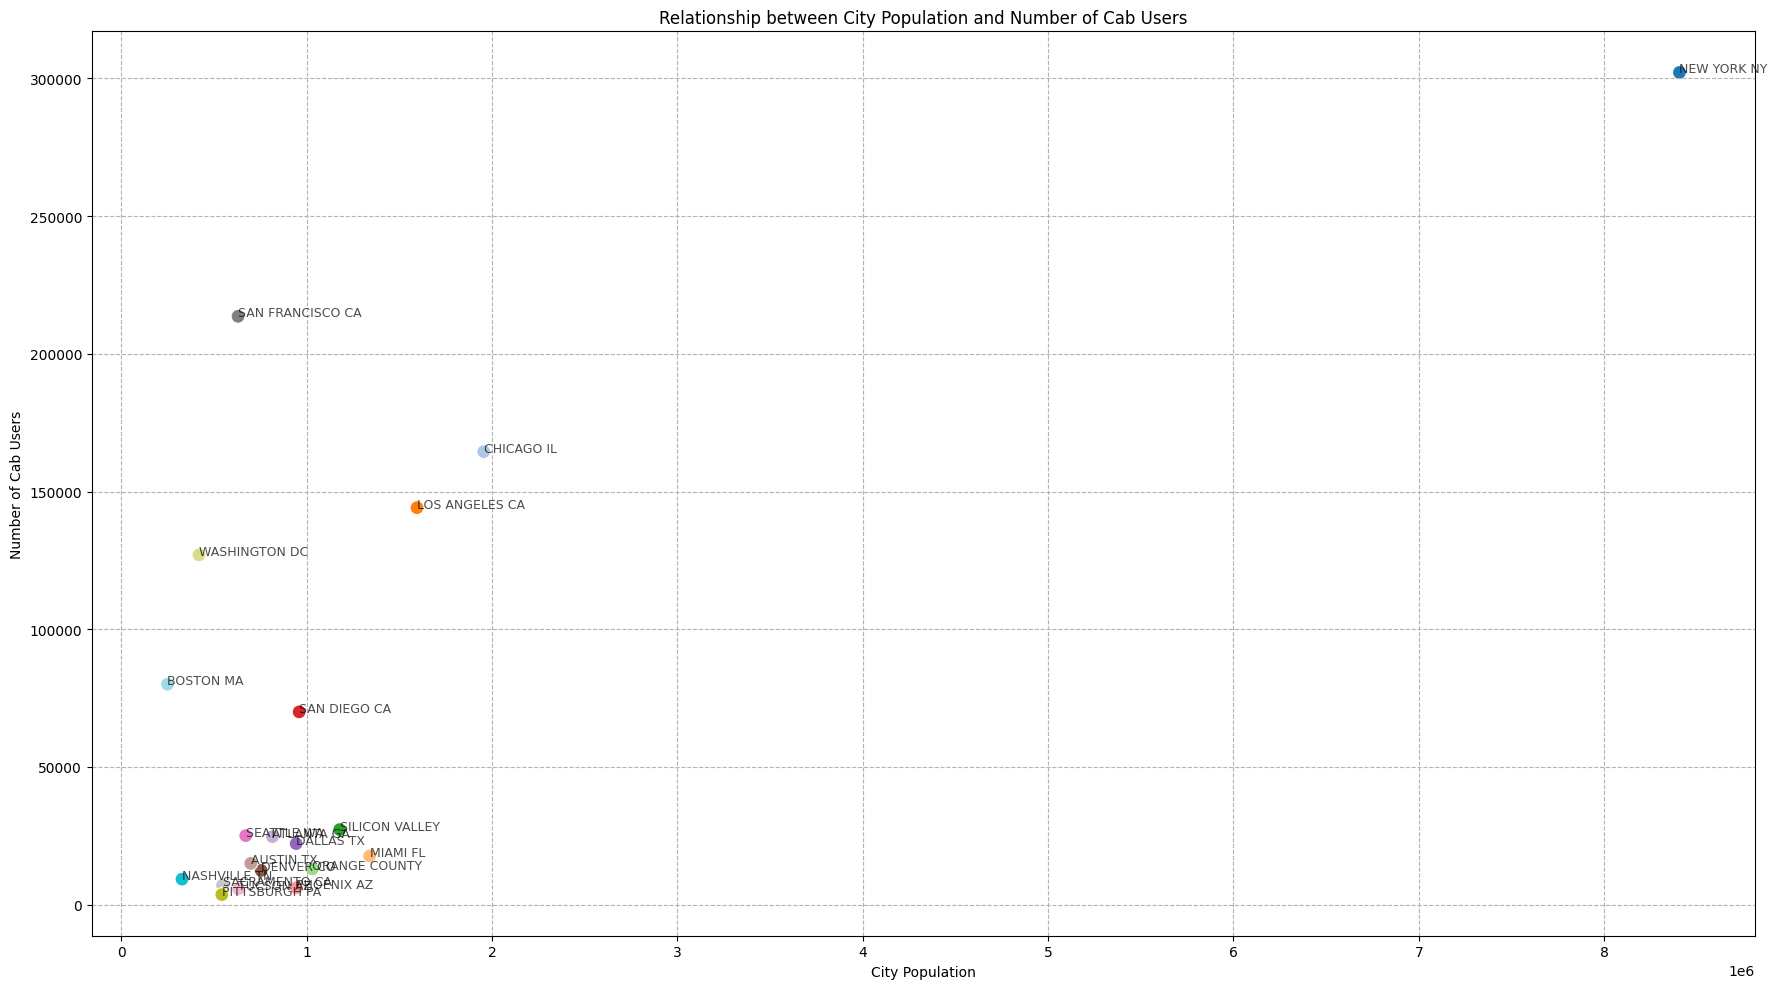

In [74]:
plt.figure(figsize=(18, 10))
sb.scatterplot(data=city_data, x='Population', y='Users', hue='City', palette='tab20', s=100, legend=None)

# Annotating each point
for i, city in enumerate(city_data['City']):
    plt.annotate(city, (city_data.iloc[i]['Population'], city_data.iloc[i]['Users']), fontsize=9, alpha=0.7)

plt.title('Relationship between City Population and Number of Cab Users')
plt.xlabel('City Population')
plt.ylabel('Number of Cab Users')
plt.grid(True, which='both', ls="--", c='0.7')
plt.tight_layout()
plt.show()

San Francisco has a very high percentage of cab users and is worth investigating. This also shows the cities that have a lower cab user number for its population and could be an untapped market. Now, I would like to investigate which cities have the best potential for growth.

In [75]:
#Calculate the percentage of cab users
city_data['Percentage Cab Users'] = (city_data['Users'] / city_data['Population']) * 100

sorted_city_data = city_data.sort_values(by='Population', ascending=False)

display(sorted_city_data[['City', 'Population', 'Percentage Cab Users']])

# Correlation Analysis
correlation_value = city_data['Population'].corr(city_data['Users'])

print(f" Correlation between population and cab users: {correlation_value}")

,City,Population,Percentage Cab Users
0,NEW YORK NY,8405837,3.594514
1,CHICAGO IL,1955130,8.412126
2,LOS ANGELES CA,1595037,9.036279
3,MIAMI FL,1339155,1.319862
4,SILICON VALLEY,1177609,2.313756
5,ORANGE COUNTY,1030185,1.261327
6,SAN DIEGO CA,959307,7.296413
7,PHOENIX AZ,943999,0.649683
8,DALLAS TX,942908,2.349858
9,ATLANTA GA,814885,3.031225


 Correlation between population and cab users: 0.7033818983284993


7 out of the 10 top cities have under a 5% cab user ratio. These cities have potential to be great investments with further investigation into the amount of cars, size of the city, and amount of public transportation. Correlation analysis also indicates a strong correlation between population and cab users. With further investigation, growing cities with a need for cabs would be a great investment. Data on growth over time would be a great addition.

##### Customer Dataset
Next, I will look for trends in age, income, and gender for cab customers.

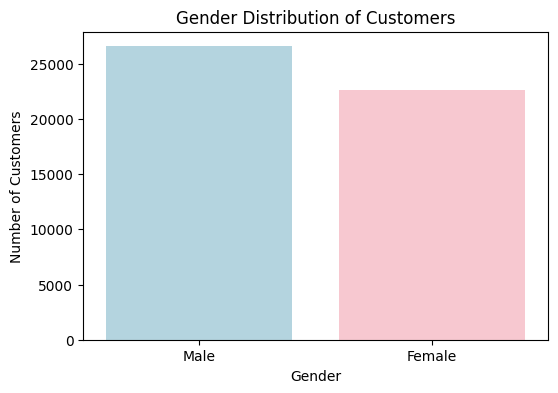

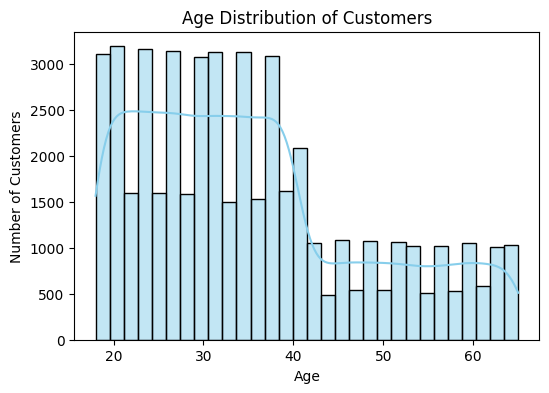

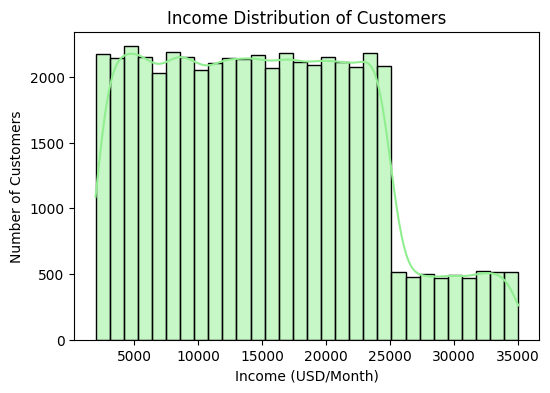

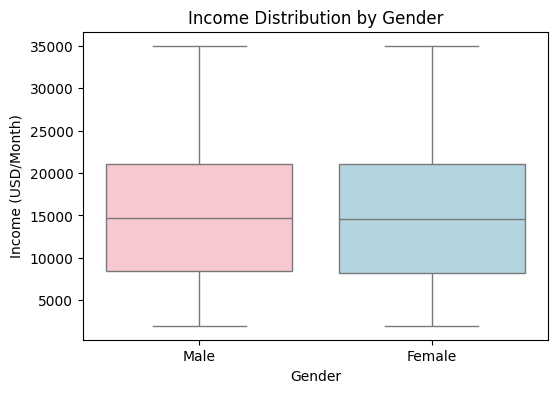

In [76]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sb.countplot(data=customer_data, x='Gender', palette=['lightblue', 'pink'], hue='Gender')
plt.title('Gender Distribution of Customers')
plt.ylabel('Number of Customers')
plt.show()

# Age Distribution
plt.figure(figsize=(6, 4))
sb.histplot(customer_data['Age'], bins=30, color='skyblue', kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# Income Distribution
plt.figure(figsize=(6, 4))
sb.histplot(customer_data['Income (USD/Month)'], bins=30, color='lightgreen', kde=True)
plt.title('Income Distribution of Customers')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Number of Customers')
plt.show()

# Bivariate Analysis
# Income Variation Across Genders
plt.figure(figsize=(6, 4))
sb.boxplot(data=customer_data, x='Gender', y='Income (USD/Month)', palette=['pink', 'lightblue'], hue='Gender')
plt.title('Income Distribution by Gender')
plt.ylabel('Income (USD/Month)')
plt.xlabel('Gender')
plt.show()

From these visualizations, we can see that gender and income by gender are very balanced, so that will not help in targeting an audience. Age takes a big role in cab user activity as a majority of them fall within the 20-40 year old range. Lastly, cab user numbers stay fairly constant throughout the income range aside from the extreme lows and extreme highs. This data helps us see that cab users are a wide ranging group.

##### Transaction Dataset

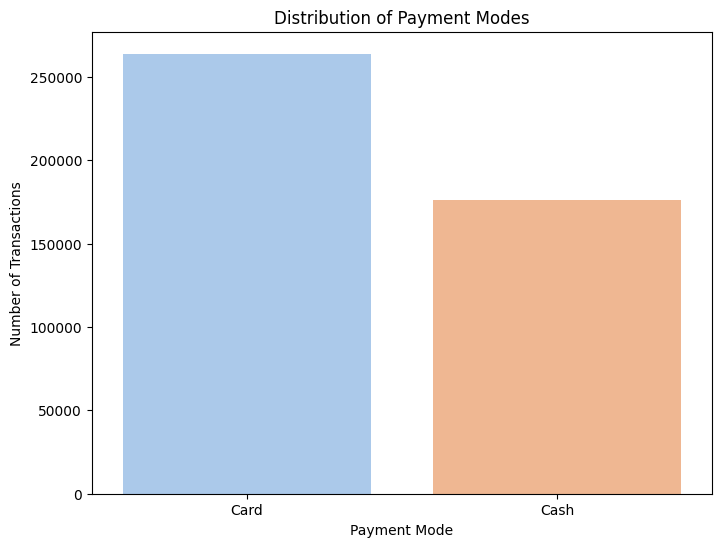

In [81]:
plt.figure(figsize=(8, 6))
sb.countplot(data=transaction_data, x='Payment_Mode', palette='pastel', hue='Payment_Mode', legend=False)
plt.title('Distribution of Payment Modes')
plt.ylabel('Number of Transactions')
plt.xlabel('Payment Mode')
plt.show()

While card transactions are more common, cash still accounts for a large portion of transactions. It would be wise to keep support for both but card dominance can help guide strategy with deals.

##### Joined/Merged Datasets

In [87]:
# Merging the datasets
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID', how='inner')
merged_data = pd.merge(merged_data, customer_data, on='Customer ID', how='inner')
merged_data = pd.merge(merged_data, city_data, on='City', how='left')

merged_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Day of Week,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Percentage Cab Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,Friday,29290,Card,Male,28,10813,814885,24701,3.031225
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,Saturday,29290,Cash,Male,28,10813,814885,24701,3.031225
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,Friday,29290,Card,Male,28,10813,814885,24701,3.031225
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,Wednesday,27703,Card,Male,27,9237,814885,24701,3.031225
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,Saturday,27703,Card,Male,27,9237,814885,24701,3.031225


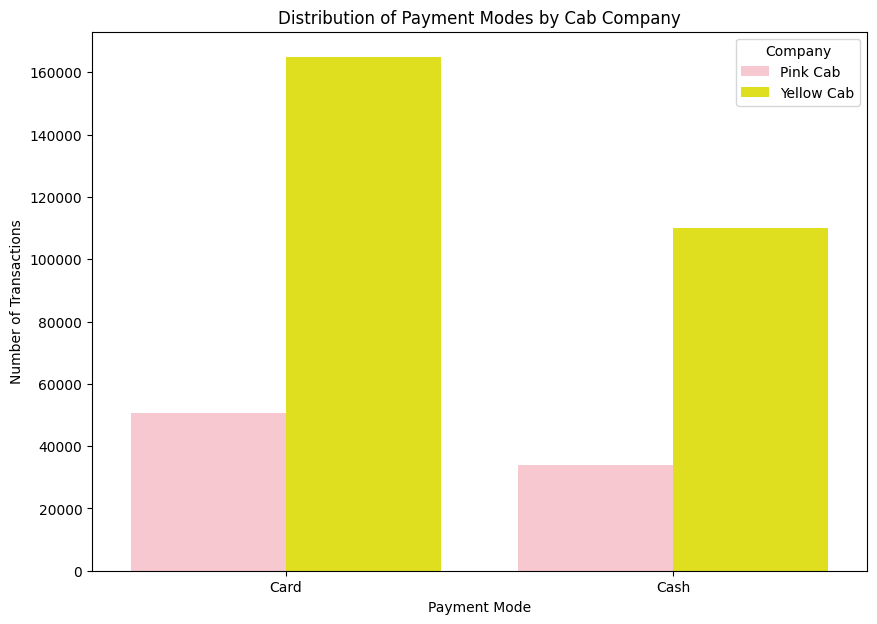

In [88]:
plt.figure(figsize=(10, 7))
sb.countplot(data=merged_data, x='Payment_Mode', hue='Company', palette=['pink', 'yellow'])
plt.title('Distribution of Payment Modes by Cab Company')
plt.ylabel('Number of Transactions')
plt.xlabel('Payment Mode')
plt.legend(title='Company')
plt.show()